In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("train.csv")
df.head()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,4,6,7,10,11,12,13,14,17,18,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,...,p_size,b_size,size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,allocated _memory,total_processing_time
0,1,131.760000,vp8,640,480,104723.0,25.145,37,3257.0,0.0,...,778937,0,1.7248e+06,flv,539000.0,24,640,480.0,221152.0,1.048
1,2,189.956000,flv,320,240,231296.0,29,97,5597.0,0.0,...,4.91173e+06,0,5.49203e+06,flv,109000.0,29.97,320,240.0,218664.0,-0.468
2,3,110.966995,h264,480,360,NaN,30,59,3271.0,0.0,...,4.97866e+06,0,5.50829e+06,h264,56000.0,15,320,240.0,216820.0,3.696
3,4,95.462000,h264,640,480,809256.0,29,51,2811.0,0.0,...,8.77016e+06,0,9.65666e+06,vp8,109000.0,12,320,240.0,221160.0,3.452
4,5,63.667000,h264,640,480,972572.0,15,33,923.0,0.0,...,6.48044e+06,0,7.7401e+06,flv,56000.0,24,1280,720.0,219656.0,2.692


In [43]:
df.describe()

,id,video_duration,bitrate,p_frames,b_frames,bitrate_output,output_height,allocated _memory
count,48150.000000,48137.000000,4.813800e+04,48125.000000,48145.000000,4.812800e+04,48135.00000,4.813000e+04
mean,24075.500000,286.398789,6.926718e+05,6530.854483,8.703666,1.428838e+07,519.39919,8.221118e+05
std,13899.852068,294.088513,1.094609e+06,6111.190606,90.733736,2.562983e+09,2098.55597,8.263332e+07
min,1.000000,31.080000,-3.971120e+05,-5974.000000,-44.000000,0.000000e+00,-720.00000,-8.643220e+05
25%,12038.250000,106.765000,1.343340e+05,2329.000000,0.000000,1.090000e+05,240.00000,2.168200e+05
50%,24075.500000,239.141660,2.911500e+05,5515.000000,0.000000,5.390000e+05,360.00000,2.194800e+05
75%,36112.750000,379.320000,6.529670e+05,9155.000000,0.000000,3.000000e+06,720.00000,2.196560e+05
max,48150.000000,25844.086000,6.010942e+06,304959.000000,9407.000000,5.600000e+11,360000.00000,1.656680e+10


In [44]:
df.isnull().sum()

id                         0
video_duration            13
coding_standard            8
width                     20
height                     6
bitrate                   12
framerate                 17
i_frames                   9
p_frames                  25
b_frames                   5
frames                    21
i_size                    30
p_size                    35
b_size                     0
size                      32
coding_standard_output    37
bitrate_output            22
framerate_output           8
output_width               7
output_height             15
allocated _memory         20
total_processing_time      3
dtype: int64

In [45]:
def replace_nan():
    for i in range(1, 22):
        try:
            mean = df.iloc[:, i].mean(skipna=True)
            df.iloc[:, i].fillna(mean, inplace = True)
        except TypeError:
            pass
        
replace_nan()
df.dropna(inplace=True)

In [46]:
df.isnull().sum()

id                        0
video_duration            0
coding_standard           0
width                     0
height                    0
bitrate                   0
framerate                 0
i_frames                  0
p_frames                  0
b_frames                  0
frames                    0
i_size                    0
p_size                    0
b_size                    0
size                      0
coding_standard_output    0
bitrate_output            0
framerate_output          0
output_width              0
output_height             0
allocated _memory         0
total_processing_time     0
dtype: int64

In [47]:
df.dtypes

id                          int64
video_duration            float64
coding_standard            object
width                      object
height                     object
bitrate                   float64
framerate                  object
i_frames                   object
p_frames                  float64
b_frames                  float64
frames                     object
i_size                     object
p_size                     object
b_size                     object
size                       object
coding_standard_output     object
bitrate_output            float64
framerate_output           object
output_width               object
output_height             float64
allocated _memory         float64
total_processing_time      object
dtype: object

In [48]:
df = df[df['total_processing_time'] != '#NAME?']
df = df[(df['coding_standard_output'] != '0')]

In [49]:
names = ['video_duration', 'coding_standard', 'width', 'height', 'bitrate',
       'framerate', 'i_frames', 'p_frames', 'b_frames', 'frames', 'i_size',
       'p_size', 'b_size', 'size', 'coding_standard_output', 'bitrate_output',
       'framerate_output', 'output_width', 'output_height',
       'allocated _memory', 'total_processing_time']

In [50]:
for i in names:
    df = df[df[i] != '#NAME?']
    df = df[df[i] != '-']

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise compa

In [51]:
for i in names:
    try:
        df[i] = pd.to_numeric(df[i], downcast = "float")
    except:
        continue

In [52]:
df.dtypes

id                          int64
video_duration            float32
coding_standard            object
width                     float32
height                    float32
bitrate                   float32
framerate                 float32
i_frames                  float32
p_frames                  float32
b_frames                  float32
frames                    float32
i_size                    float32
p_size                    float32
b_size                    float32
size                      float32
coding_standard_output     object
bitrate_output            float32
framerate_output          float32
output_width              float32
output_height             float32
allocated _memory         float32
total_processing_time     float32
dtype: object

<AxesSubplot:>

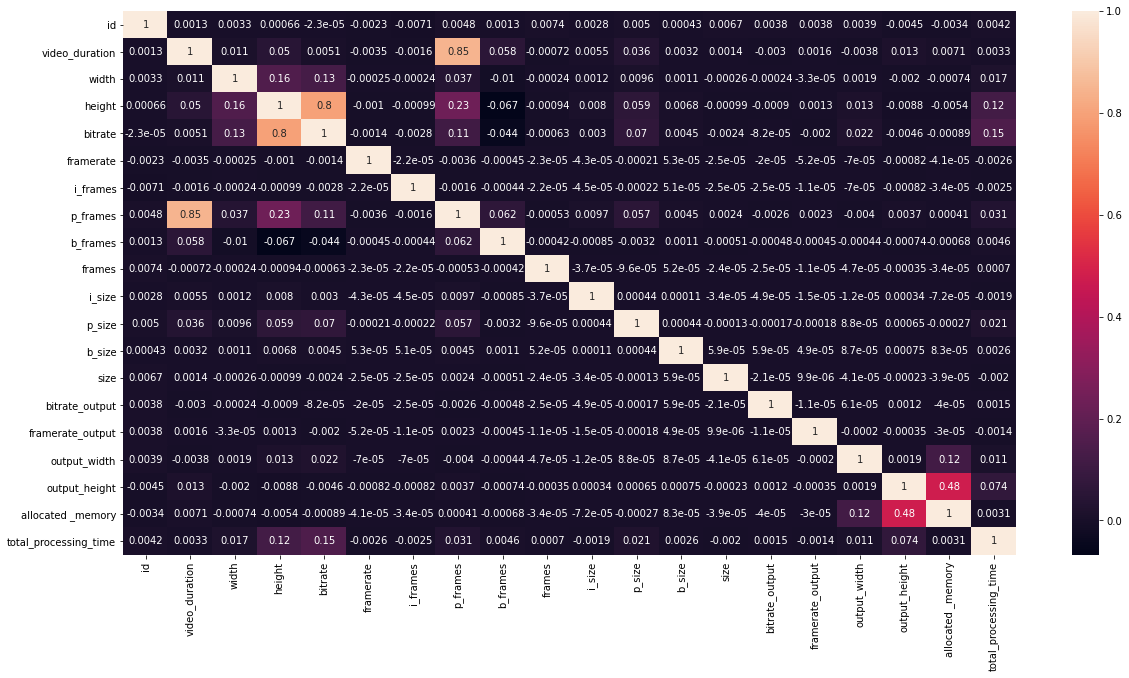

In [53]:
fig = plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

video_duration


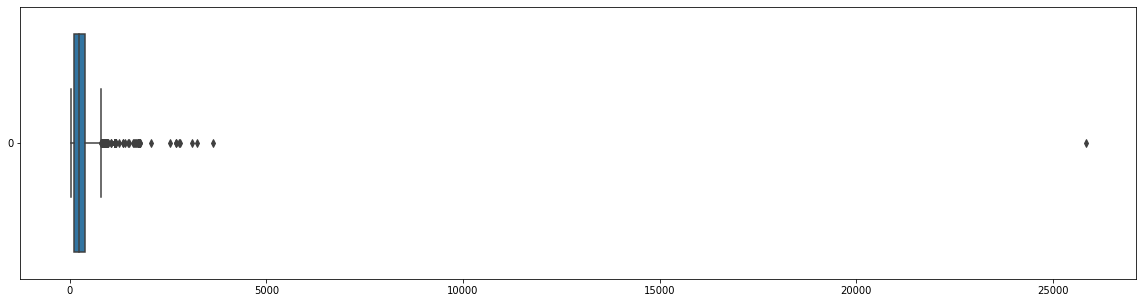

coding_standard
Categorical Data
width


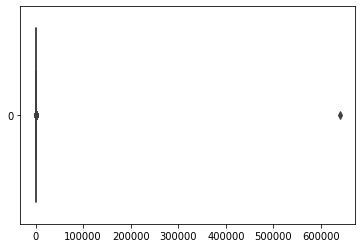

height


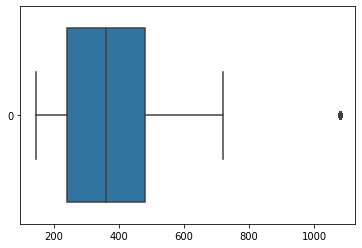

bitrate


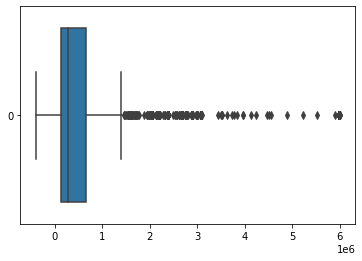

framerate


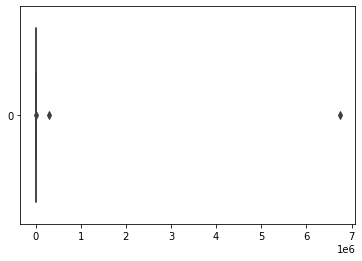

i_frames


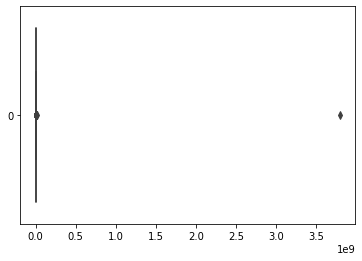

p_frames


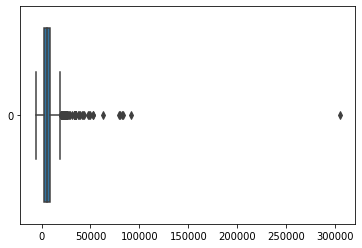

b_frames


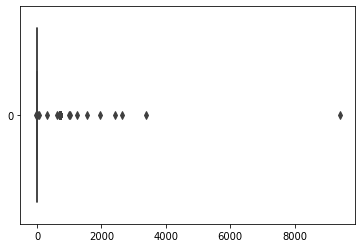

frames


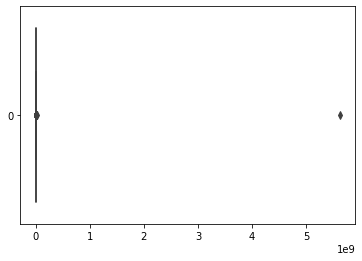

i_size


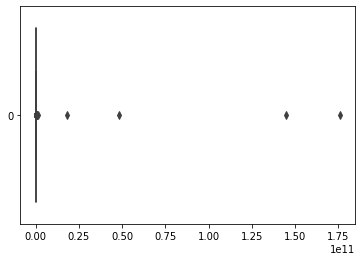

p_size


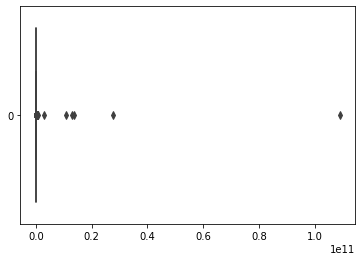

b_size


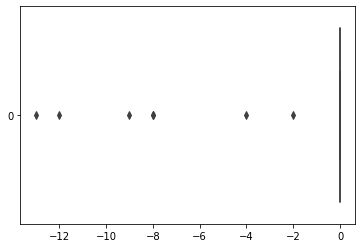

size


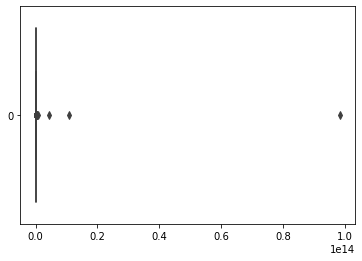

coding_standard_output
Categorical Data
bitrate_output


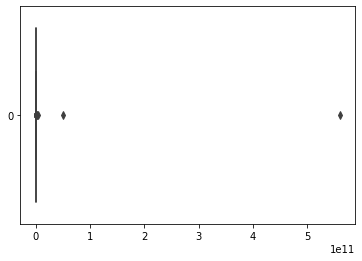

framerate_output


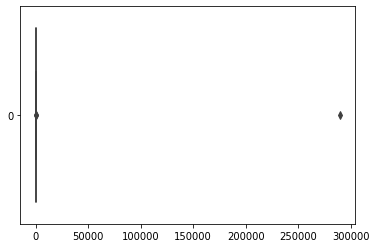

output_width


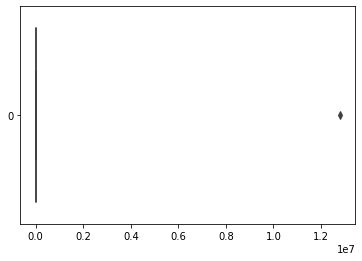

output_height


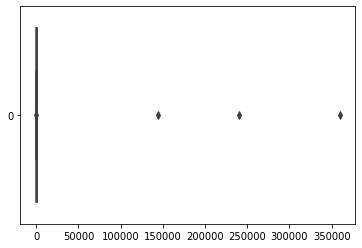

allocated _memory


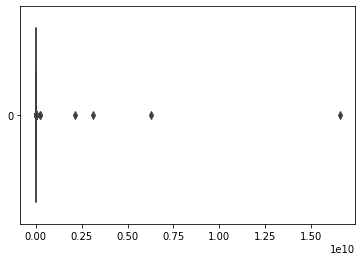

total_processing_time


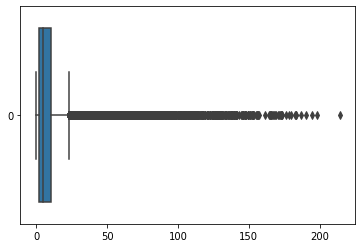

In [14]:
col_name = list(df.columns)
fig = plt.figure(figsize = (20, 5))
for i in range(1, 22):
    try:
        print(col_name[i])
        sns.boxplot(data=df.iloc[:, i], orient="h")
        plt.show()
    except:
        print("Categorical Data")
       

In [98]:
df = df[(df['video_duration']<1000)&(df['width']<100000)
       &(df['b_size']>-1)&(df['frames']<25000)&(df['p_frames']<30000)&(df['i_frames']<5000)&(df['b_frames']<50)
       &(df['framerate']<50000)&(df['framerate']>0)&(df['bitrate']<1.5*10**6)&(df['b_frames']<500)
       &(df['framerate_output']<40000)&(df['bitrate_output']<10**7)
       &(df['output_height']< 50000)&(df['p_size']<2*10**7)&(df['i_size']<5*10**6)]

width


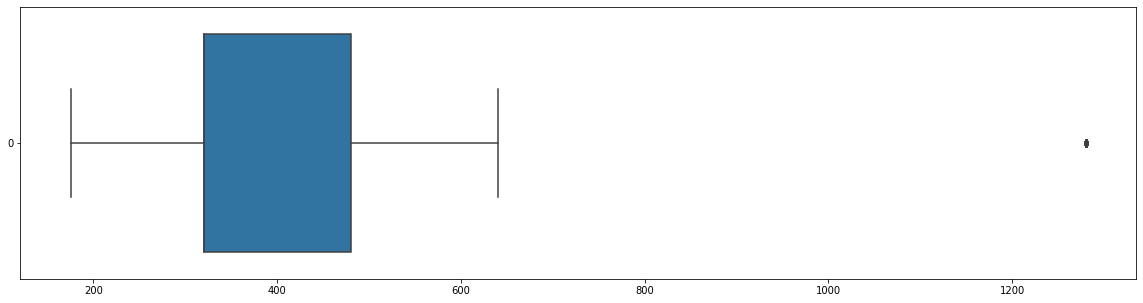

height


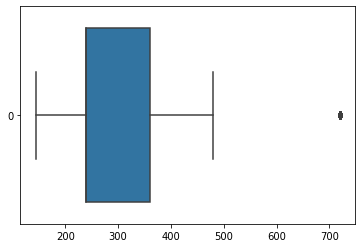

bitrate


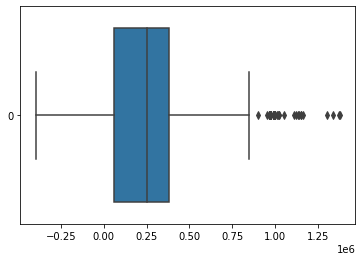

framerate


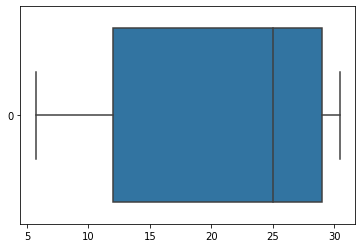

i_frames


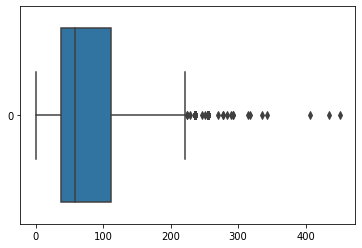

p_frames


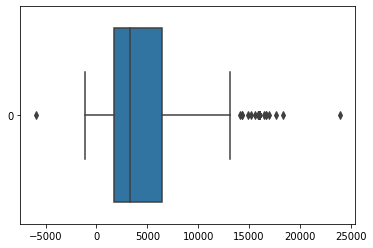

b_frames


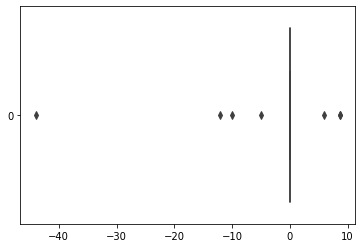

frames


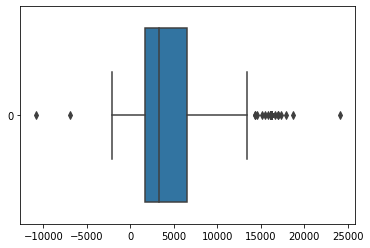

i_size


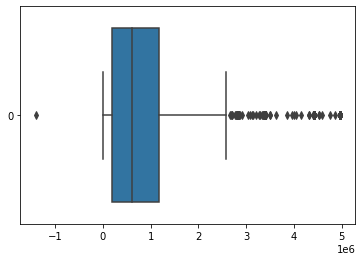

p_size


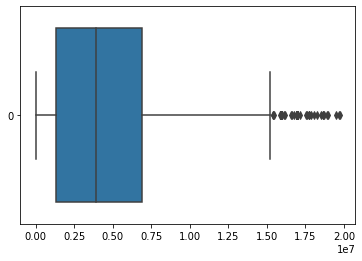

b_size


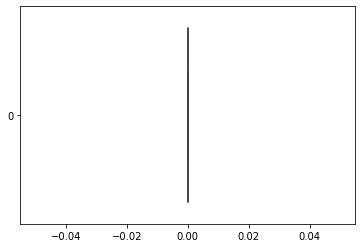

size


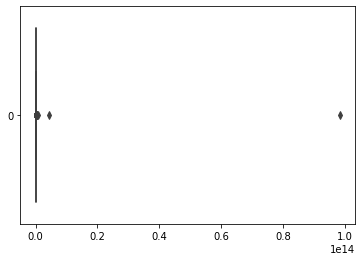

bitrate_output


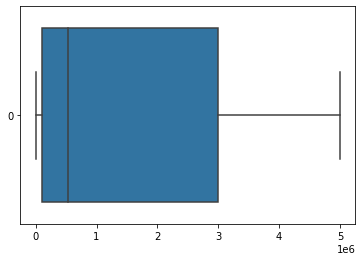

framerate_output


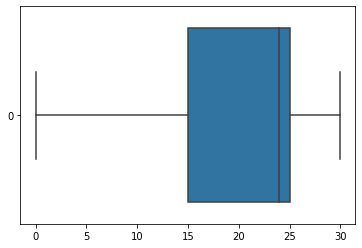

output_width


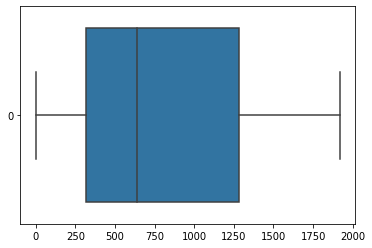

output_height


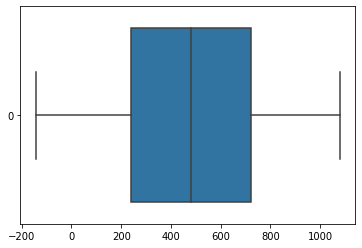

allocated _memory


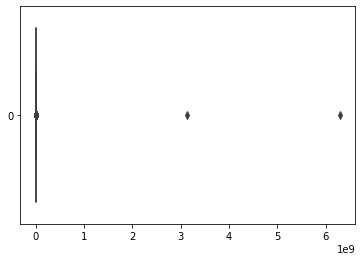

total_processing_time


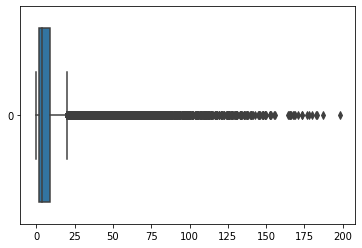

Categorical Data
Categorical Data
Categorical Data


In [99]:
col_name = list(df.columns)
fig = plt.figure(figsize = (20, 5))
for i in range(1, 22):
    try:
        print(col_name[i])
        sns.boxplot(data=df.iloc[:, i], orient="h")
        plt.show()
    except:
        print("Categorical Data")
       

In [15]:
df

,id,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,...,p_size,b_size,size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,allocated _memory,total_processing_time
0,1,131.759995,vp8,640.0,480.0,1.047230e+05,25.145039,37.0,3257.0,0.0,...,778937.0,0.0,1724802.0,flv,539000.0,24.000000,640.0,480.0,221152.0,1.048
1,2,189.955994,flv,320.0,240.0,2.312960e+05,29.000000,97.0,5597.0,0.0,...,4911734.0,0.0,5492026.0,flv,109000.0,29.969999,320.0,240.0,218664.0,-0.468
2,3,110.966995,h264,480.0,360.0,6.926718e+05,30.000000,59.0,3271.0,0.0,...,4978664.0,0.0,5508291.0,h264,56000.0,15.000000,320.0,240.0,216820.0,3.696
3,4,95.461998,h264,640.0,480.0,8.092560e+05,29.000000,51.0,2811.0,0.0,...,8770159.0,0.0,9656655.0,vp8,109000.0,12.000000,320.0,240.0,221160.0,3.452
4,5,63.667000,h264,640.0,480.0,9.725720e+05,15.000000,33.0,923.0,0.0,...,6480438.0,0.0,7740095.0,flv,56000.0,24.000000,1280.0,720.0,219656.0,2.692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48142,48143,167.391663,h264,1280.0,720.0,2.207484e+06,24.000000,86.0,3931.0,0.0,...,41819888.0,0.0,46189308.0,mpeg4,820000.0,15.000000,1920.0,1080.0,219656.0,9.777
48146,48147,67.583336,mpeg4,176.0,144.0,5.122500e+04,12.000000,15.0,777.0,0.0,...,385164.0,0.0,432749.0,vp8,5000000.0,12.000000,1920.0,1080.0,219480.0,22.417
48147,48148,581.232971,h264,480.0,360.0,2.959790e+05,30.000000,310.0,17128.0,0.0,...,11352574.0,0.0,21504146.0,vp8,5000000.0,15.000000,640.0,480.0,218932.0,6.460
48148,48149,645.840027,vp8,320.0,240.0,9.590300e+04,25.032558,138.0,16008.0,0.0,...,6660941.0,0.0,7742262.0,vp8,539000.0,29.969999,176.0,144.0,219196.0,1.976


In [54]:
df_1 = pd.get_dummies(df["coding_standard"])
df_1

,flv,h264,mpeg4,vp8
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
48142,0,1,0,0
48146,0,0,1,0
48147,0,1,0,0
48148,0,0,0,1


In [55]:
df_2 =  pd.get_dummies(df["coding_standard_output"])
df_2.rename({"flv":"flv_o", "h264":"h264_o", "mpeg4":"mpeg4_o", "vp8":"vp8_o"}, axis="columns",inplace=True)
df_2

,flv_o,h264_o,mpeg4_o,vp8_o
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
48142,0,0,1,0
48146,0,0,0,1
48147,0,0,0,1
48148,0,0,0,1


In [56]:
df.drop(columns=['id', 'coding_standard', 'coding_standard_output'], inplace=True)
final_df = pd.concat([df, df_1],axis = 1)
final_df = pd.concat([final_df, df_2],axis = 1)
final_df

,video_duration,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,...,allocated _memory,total_processing_time,flv,h264,mpeg4,vp8,flv_o,h264_o,mpeg4_o,vp8_o
0,131.759995,640.0,480.0,1.047230e+05,25.145039,37.0,3257.0,0.0,3294.0,945865.0,...,221152.0,1.048,0,0,0,1,1,0,0,0
1,189.955994,320.0,240.0,2.312960e+05,29.000000,97.0,5597.0,0.0,5694.0,580292.0,...,218664.0,-0.468,1,0,0,0,1,0,0,0
2,110.966995,480.0,360.0,6.926718e+05,30.000000,59.0,3271.0,0.0,3330.0,529627.0,...,216820.0,3.696,0,1,0,0,0,1,0,0
3,95.461998,640.0,480.0,8.092560e+05,29.000000,51.0,2811.0,0.0,2862.0,886496.0,...,221160.0,3.452,0,1,0,0,0,0,0,1
4,63.667000,640.0,480.0,9.725720e+05,15.000000,33.0,923.0,0.0,956.0,1259657.0,...,219656.0,2.692,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48142,167.391663,1280.0,720.0,2.207484e+06,24.000000,86.0,3931.0,0.0,4017.0,4369420.0,...,219656.0,9.777,0,1,0,0,0,0,1,0
48146,67.583336,176.0,144.0,5.122500e+04,12.000000,15.0,777.0,0.0,792.0,47585.0,...,219480.0,22.417,0,0,1,0,0,0,0,1
48147,581.232971,480.0,360.0,2.959790e+05,30.000000,310.0,17128.0,0.0,17438.0,10151572.0,...,218932.0,6.460,0,1,0,0,0,0,0,1
48148,645.840027,320.0,240.0,9.590300e+04,25.032558,138.0,16008.0,0.0,16146.0,1081321.0,...,219196.0,1.976,0,0,0,1,0,0,0,1


In [57]:
x = list(final_df["total_processing_time"])
final_df.drop(columns="total_processing_time", inplace = True)
final_df['total_processing_time'] = x
final_df

,video_duration,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,...,allocated _memory,flv,h264,mpeg4,vp8,flv_o,h264_o,mpeg4_o,vp8_o,total_processing_time
0,131.759995,640.0,480.0,1.047230e+05,25.145039,37.0,3257.0,0.0,3294.0,945865.0,...,221152.0,0,0,0,1,1,0,0,0,1.048
1,189.955994,320.0,240.0,2.312960e+05,29.000000,97.0,5597.0,0.0,5694.0,580292.0,...,218664.0,1,0,0,0,1,0,0,0,-0.468
2,110.966995,480.0,360.0,6.926718e+05,30.000000,59.0,3271.0,0.0,3330.0,529627.0,...,216820.0,0,1,0,0,0,1,0,0,3.696
3,95.461998,640.0,480.0,8.092560e+05,29.000000,51.0,2811.0,0.0,2862.0,886496.0,...,221160.0,0,1,0,0,0,0,0,1,3.452
4,63.667000,640.0,480.0,9.725720e+05,15.000000,33.0,923.0,0.0,956.0,1259657.0,...,219656.0,0,1,0,0,1,0,0,0,2.692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48142,167.391663,1280.0,720.0,2.207484e+06,24.000000,86.0,3931.0,0.0,4017.0,4369420.0,...,219656.0,0,1,0,0,0,0,1,0,9.777
48146,67.583336,176.0,144.0,5.122500e+04,12.000000,15.0,777.0,0.0,792.0,47585.0,...,219480.0,0,0,1,0,0,0,0,1,22.417
48147,581.232971,480.0,360.0,2.959790e+05,30.000000,310.0,17128.0,0.0,17438.0,10151572.0,...,218932.0,0,1,0,0,0,0,0,1,6.460
48148,645.840027,320.0,240.0,9.590300e+04,25.032558,138.0,16008.0,0.0,16146.0,1081321.0,...,219196.0,0,0,0,1,0,0,0,1,1.976


In [58]:
list(final_df.columns)[0:26]

['video_duration',
 'width',
 'height',
 'bitrate',
 'framerate',
 'i_frames',
 'p_frames',
 'b_frames',
 'frames',
 'i_size',
 'p_size',
 'b_size',
 'size',
 'bitrate_output',
 'framerate_output',
 'output_width',
 'output_height',
 'allocated _memory',
 'flv',
 'h264',
 'mpeg4',
 'vp8',
 'flv_o',
 'h264_o',
 'mpeg4_o',
 'vp8_o']

In [59]:
final_df.drop(columns=['allocated _memory', 'size'], inplace = True)

In [60]:
from sklearn.model_selection import train_test_split

X = final_df.iloc[:, 0:24].values
Y = final_df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

In [95]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=22)
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.9885026025930979

In [62]:
from sklearn.tree import DecisionTreeRegressor

reg_2 = DecisionTreeRegressor(max_depth=35)
reg_2.fit(x_train, y_train)
reg_2.score(x_test, y_test)

0.9761167356873274

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

reg_3 = GradientBoostingRegressor(loss='ls', learning_rate=0.50, n_estimators=128, max_depth = 11)
reg_3.fit(x_train, y_train)
reg_3.score(x_test, y_test)

0.992442963333413

In [97]:
from sklearn.ensemble import BaggingRegressor

reg_4 = BaggingRegressor(n_estimators=128)
reg_4.fit(x_train, y_train)
reg_4.score(x_test, y_test)

0.9890971100677044

In [86]:
X = final_df.iloc[:, 0:24].values
Y = final_df.iloc[:, -1].values



In [87]:
reg.fit(X, Y)

RandomForestRegressor(max_depth=23)

In [27]:
reg_2.fit(X, Y)

DecisionTreeRegressor(max_depth=35)

In [88]:
reg_3.fit(X, Y)

GradientBoostingRegressor(learning_rate=0.5, max_depth=11, n_estimators=128)

In [89]:
reg_4.fit(X, Y)

BaggingRegressor(n_estimators=100)

In [69]:
test_df = pd.read_csv('test.csv')
test_df

,id,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,...,i_size,p_size,b_size,size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,allocated _memory
0,48151,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,...,64483.0,825054.0,0.0,889537.0,mpeg4,56000.0,12.0,320.0,240.0,25164.0
1,48152,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,...,64483.0,825054.0,0.0,889537.0,mpeg4,56000.0,12.0,1280.0,720.0,58528.0
2,48153,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,...,64483.0,825054.0,0.0,889537.0,mpeg4,56000.0,12.0,1920.0,1080.0,102072.0
3,48154,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,...,64483.0,825054.0,0.0,889537.0,mpeg4,56000.0,15.0,1920.0,1080.0,102072.0
4,48155,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,...,64483.0,825054.0,0.0,889537.0,mpeg4,56000.0,25.0,640.0,480.0,34308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,68780,807.974000,h264,480.0,360.0,355622.0,29.000000,433.0,23783.0,0.0,...,6406304.0,29510436.0,0.0,35916740.0,vp8,5000000.0,25.0,640.0,480.0,88112.0
20630,68781,59.482998,h264,480.0,360.0,330241.0,29.000000,61.0,1722.0,0.0,...,1147618.0,1307848.0,0.0,2455466.0,h264,242000.0,15.0,480.0,360.0,103504.0
20631,68782,128.061000,flv,320.0,240.0,257217.0,29.000000,66.0,3773.0,0.0,...,743566.0,3373880.0,0.0,4117446.0,NaN,5000000.0,12.0,0.0,144.0,88444.0
20632,68783,249.680000,vp8,320.0,240.0,359345.0,25.068274,129.0,6113.0,0.0,...,1758664.0,9456514.0,0.0,11215178.0,NaN,539000.0,12.0,176.0,144.0,88708.0


In [70]:
df_test_1 = pd.get_dummies(test_df["coding_standard"])
df_test_1

,flv,h264,mpeg4,vp8
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
20629,0,1,0,0
20630,0,1,0,0
20631,1,0,0,0
20632,0,0,0,1


In [71]:
df_test_2 = pd.get_dummies(test_df["coding_standard_output"])
df_test_2.rename({"flv":"flv_o", "h264":"h264_o", "mpeg4":"mpeg4_o", "vp8":"vp8_o"}, axis="columns",inplace=True)
df_test_2

,flv_o,h264_o,mpeg4_o,vp8_o
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
20629,0,0,0,1
20630,0,1,0,0
20631,0,0,0,0
20632,0,0,0,0


In [72]:
ids = list(test_df['id'])
test_df.drop(columns=['id', 'coding_standard', 'coding_standard_output'], inplace=True)
test_df = pd.concat([test_df, df_test_1],axis = 1)
test_df = pd.concat([test_df, df_test_2],axis = 1)
test_df

,video_duration,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,...,output_height,allocated _memory,flv,h264,mpeg4,vp8,flv_o,h264_o,mpeg4_o,vp8_o
0,130.356670,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,...,240.0,25164.0,0,0,1,0,0,0,1,0
1,130.356670,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,...,720.0,58528.0,0,0,1,0,0,0,1,0
2,130.356670,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,...,1080.0,102072.0,0,0,1,0,0,0,1,0
3,130.356670,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,...,1080.0,102072.0,0,0,1,0,0,0,1,0
4,130.356670,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,...,480.0,34308.0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,807.974000,480.0,360.0,355622.0,29.000000,433.0,23783.0,0.0,24216.0,6406304.0,...,480.0,88112.0,0,1,0,0,0,0,0,1
20630,59.482998,480.0,360.0,330241.0,29.000000,61.0,1722.0,0.0,1783.0,1147618.0,...,360.0,103504.0,0,1,0,0,0,1,0,0
20631,128.061000,320.0,240.0,257217.0,29.000000,66.0,3773.0,0.0,3839.0,743566.0,...,144.0,88444.0,1,0,0,0,0,0,0,0
20632,249.680000,320.0,240.0,359345.0,25.068274,129.0,6113.0,0.0,6242.0,1758664.0,...,144.0,88708.0,0,0,0,1,0,0,0,0


In [73]:
test_df.isnull().sum()

video_duration        5
width                 4
height                2
bitrate               9
framerate            13
i_frames             11
p_frames              3
b_frames              9
frames               10
i_size                8
p_size                9
b_size                2
size                 13
bitrate_output        5
framerate_output      8
output_width          5
output_height         7
allocated _memory     2
flv                   0
h264                  0
mpeg4                 0
vp8                   0
flv_o                 0
h264_o                0
mpeg4_o               0
vp8_o                 0
dtype: int64

In [74]:
def replace_nan():
    for i in range(0, 18):
        try:
            mean = test_df.iloc[:, i].mean(skipna=True)
            test_df.iloc[:, i].fillna(mean, inplace = True)
        except TypeError:
            pass
replace_nan()

In [75]:
test_df.isnull().sum()

video_duration       0
width                0
height               0
bitrate              0
framerate            0
i_frames             0
p_frames             0
b_frames             0
frames               0
i_size               0
p_size               0
b_size               0
size                 0
bitrate_output       0
framerate_output     0
output_width         0
output_height        0
allocated _memory    0
flv                  0
h264                 0
mpeg4                0
vp8                  0
flv_o                0
h264_o               0
mpeg4_o              0
vp8_o                0
dtype: int64

In [76]:
test_df.drop(columns=['allocated _memory', 'size'], inplace=True)

In [90]:
x = test_df.iloc[:, 0:24].values
prediction_1 = np.array(reg.predict(x))
#prediction_2 = np.array(reg_2.predict(x))
prediction_3 = np.array(reg_3.predict(x))
prediction_4 = np.array(reg_4.predict(x))

prediction = (prediction_1*0.9893 +prediction_3*0.9929+ prediction_4*0.9891)/(0.9893+0.9929+0.9891)

In [91]:
sub = pd.DataFrame({'id':ids, 'total_processing_time':prediction})
sub.to_csv("Submission.csv", index=False)